In [1]:
from getdist import plots, MCSamples, loadMCSamples
from getdist.mcsamples import MCSamplesFromCobaya
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
from cobaya.post import post
import sacc
import pyccl as ccl
import os
from getdist import plots, loadMCSamples

In [2]:
def plotchains(names):
    g = plots.get_subplot_plotter()
    g.settings.legend_fontsize = 24
    g.settings.axes_labelsize = 24
    g.settings.axes_fontsize = 24
    g.settings.linewidth=2
    g.settings.figure_legend_frame=False
    g.triangle_plot([chs[n] for n in names],
                    ['Omega_m', 'sigma8', 'h'],
                    names,
                    filled=[True, True, True])
    for n in names:
        print(n)
        ch = chs[n]
        print(ch.getInlineLatex('sigma8'), ch.getInlineLatex('Omega_m'))

In [3]:
chs = {}
chs['Fiducial'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO", settings={'ignore_rows': 0.3})
chs['N(z) stack'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzG_wBAO", settings={'ignore_rows': 0.3})
chs['kmax = 0.2'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_kmax0p2", settings={'ignore_rows': 0.3})
chs['kmax = 0.1'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_kmax0p1", settings={'ignore_rows': 0.3})
chs['no deproj.'] = loadMCSamples("results_GS8/G20.5_2bins_nodp_nzDIR_wBAO", settings={'ignore_rows': 0.3})
chs['G20.0'] = loadMCSamples("results_GS8/G20.0_2bins_wdp_nzDIR_wBAO", settings={'ignore_rows': 0.3})
chs['1-bin'] = loadMCSamples("results_GS8/G20.5_1bins_wdp_nzDIR_wBAO", settings={'ignore_rows': 0.3})
chs['bin 1'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_bin1", settings={'ignore_rows': 0.3})
chs['bin 2'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_bin2", settings={'ignore_rows': 0.3})
chs['low mag.'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_lomag", settings={'ignore_rows': 0.3})
chs['b(z)'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_Qbias", settings={'ignore_rows': 0.3})
chs['H0-Shoes'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_H0Shoes", settings={'ignore_rows': 0.3})
chs['H0-Planck'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_H0Planck", settings={'ignore_rows': 0.3})
chs['Omh3 prior'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_Omh3", settings={'ignore_rows': 0.3})
chs['ClustZ'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzTomo_wBAO", settings={'ignore_rows': 0.3})
chs['ClustZ bin 1'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzTomo_wBAO_bin1", settings={'ignore_rows': 0.3})
chs['ClustZ bin 2'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzTomo_wBAO_bin2", settings={'ignore_rows': 0.3})
chs['Shot noise marg.'] = loadMCSamples("results_GS8/G20.5_2bins_wdp_nzDIR_wBAO_Asn0.1", settings={'ignore_rows': 0.3})
chs['Planck'] = loadMCSamples("results_GS8/planck/base_plikHM_TTTEEE_lowl_lowE_lensing",
                              settings={'ignore_rows': 0.3})
chs['Planck'].addDerived(chs['Planck']['omegam'], name='Omega_m', label='\Omega_m')
chs['Planck'].addDerived(chs['Planck']['H0']*0.01, name='h', label='h')

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
N(z) stack
\sigma_8 = 0.750\pm 0.034 \Omega_m = 0.355\pm 0.019
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


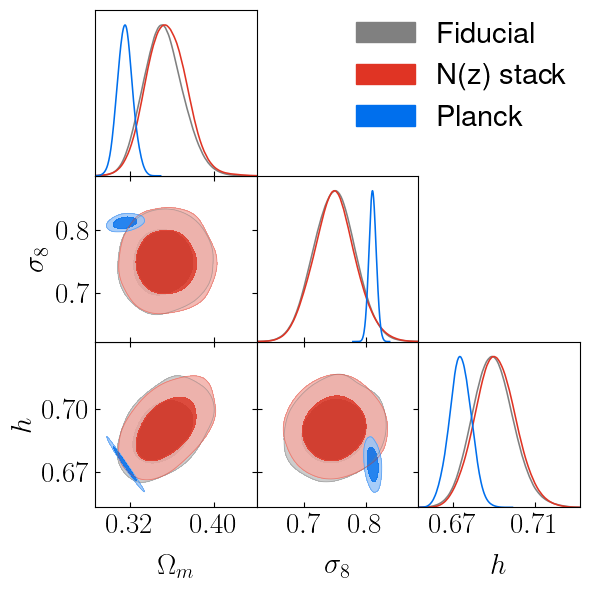

In [4]:
plotchains(['Fiducial', 'N(z) stack', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
H0-Shoes
\sigma_8 = 0.776^{+0.033}_{-0.038} \Omega_m = 0.331^{+0.022}_{-0.026}
H0-Planck
\sigma_8 = 0.740\pm 0.033 \Omega_m = 0.371^{+0.025}_{-0.032}
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


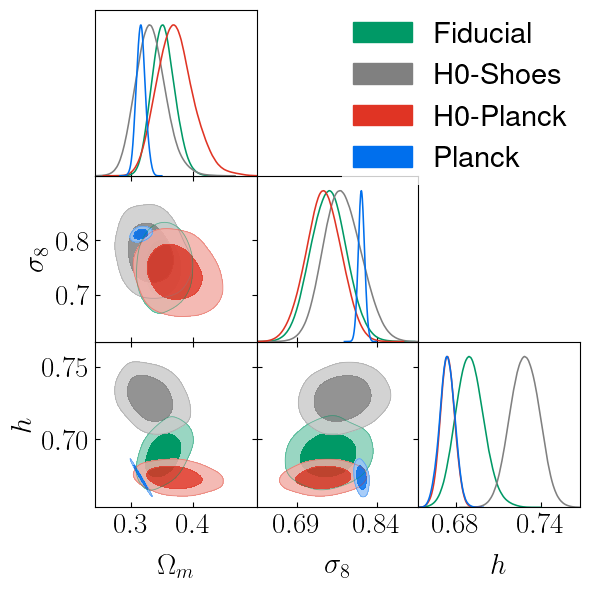

In [5]:
plotchains(['Fiducial', 'H0-Shoes', 'H0-Planck', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
Shot noise marg.
\sigma_8 = 0.751\pm 0.043 \Omega_m = 0.350^{+0.019}_{-0.023}
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


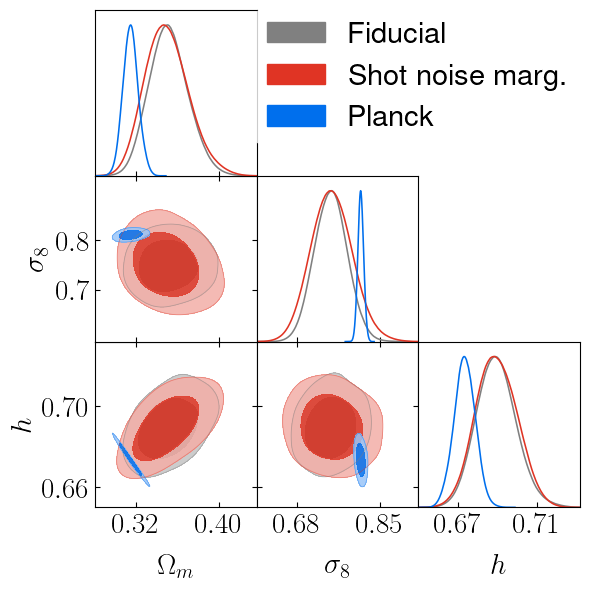

In [6]:
plotchains(['Fiducial', 'Shot noise marg.', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
bin 1
\sigma_8 = 0.806\pm 0.047 \Omega_m = 0.344^{+0.022}_{-0.025}
bin 2
\sigma_8 = 0.677\pm 0.052 \Omega_m = 0.348^{+0.021}_{-0.026}
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


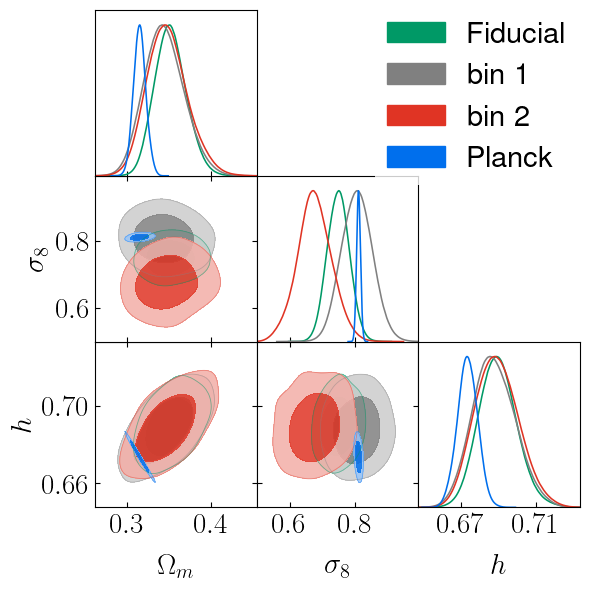

In [7]:
plotchains(['Fiducial', 'bin 1', 'bin 2', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
kmax = 0.2
\sigma_8 = 0.749^{+0.031}_{-0.036} \Omega_m = 0.349^{+0.016}_{-0.018}
kmax = 0.1
\sigma_8 = 0.761^{+0.034}_{-0.039} \Omega_m = 0.363\pm 0.021
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


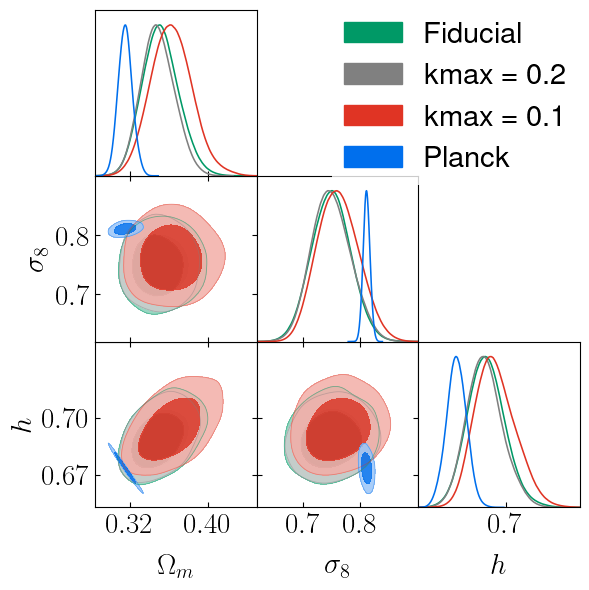

In [8]:
plotchains(['Fiducial', 'kmax = 0.2', 'kmax = 0.1', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
no deproj.
\sigma_8 = 0.754\pm 0.036 \Omega_m = 0.354^{+0.018}_{-0.021}
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


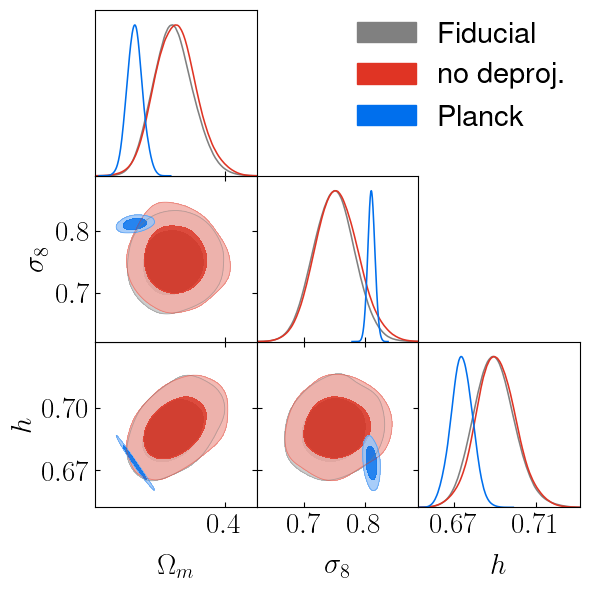

In [9]:
plotchains(['Fiducial', 'no deproj.', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
G20.0
\sigma_8 = 0.733^{+0.041}_{-0.046} \Omega_m = 0.346\pm 0.022
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


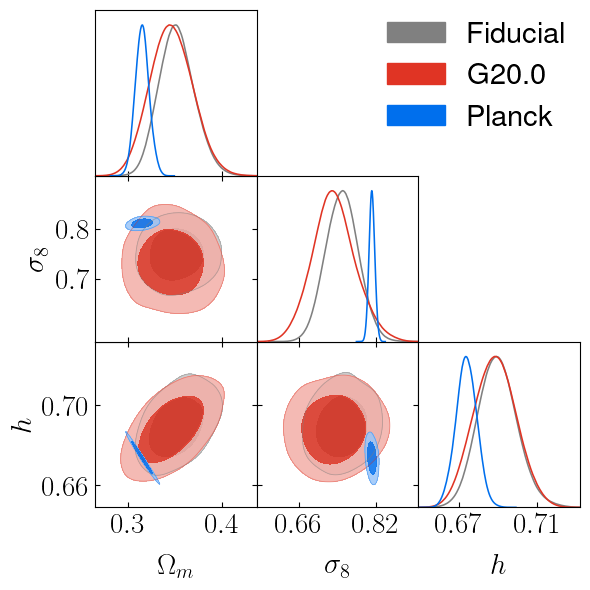

In [10]:
plotchains(['Fiducial', 'G20.0', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
1-bin
\sigma_8 = 0.736\pm 0.034 \Omega_m = 0.354\pm 0.020
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


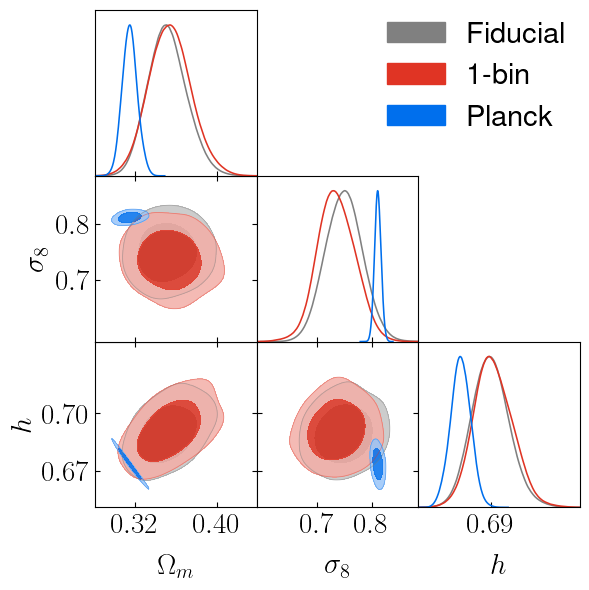

In [11]:
plotchains(['Fiducial', '1-bin', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
low mag.
\sigma_8 = 0.777\pm 0.039 \Omega_m = 0.346^{+0.016}_{-0.019}
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


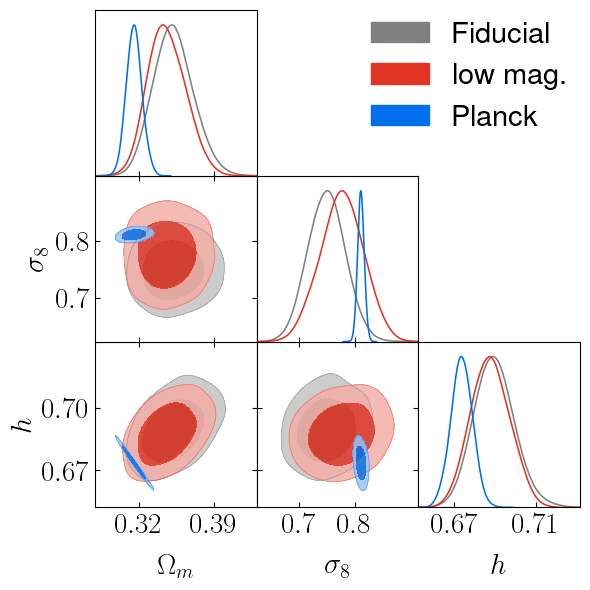

In [12]:
plotchains(['Fiducial', 'low mag.', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
b(z)
\sigma_8 = 0.749\pm 0.035 \Omega_m = 0.339\pm 0.017
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


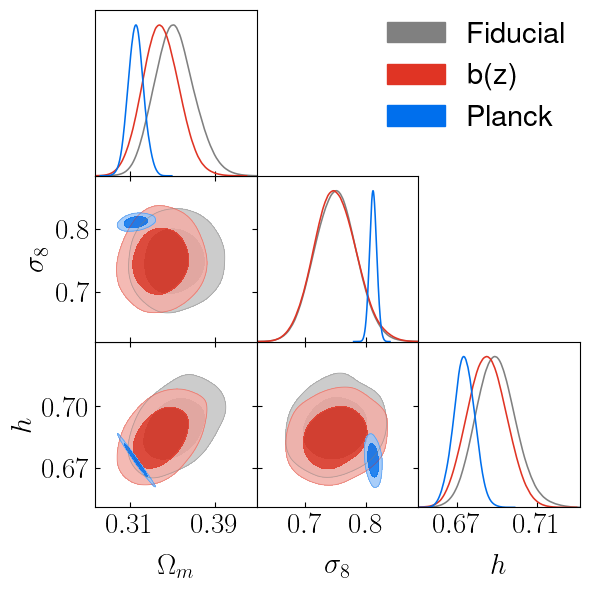

In [13]:
plotchains(['Fiducial', 'b(z)', 'Planck'])

Fiducial
\sigma_8 = 0.749\pm 0.034 \Omega_m = 0.352^{+0.017}_{-0.020}
Omh3 prior
\sigma_8 = 0.745\pm 0.034 \Omega_m = 0.3169\pm 0.0081
Planck
\sigma_8 = 0.8111\pm 0.0060 \Omega_m = 0.3153\pm 0.0073


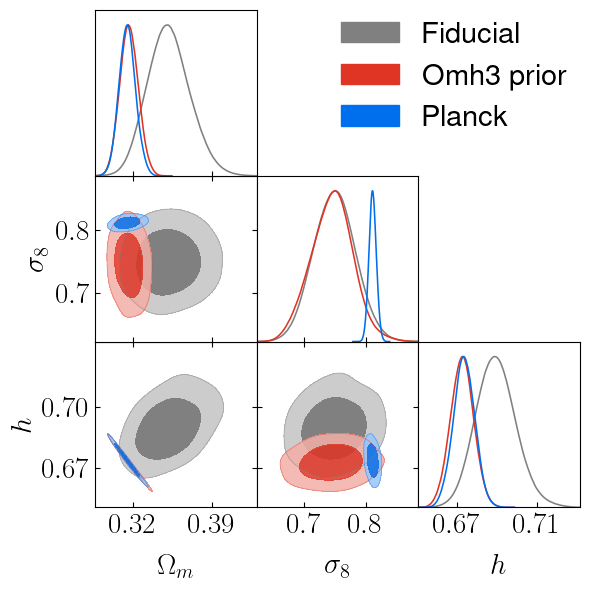

In [14]:
plotchains(['Fiducial', 'Omh3 prior', 'Planck'])

In [16]:
import sacc

In [17]:
s = sacc.Sacc.load_fits("data_GAIA/cls_g_k_2bins_G20.5_nzdir_deproj.fits")

In [20]:
def bQ(z):
    return 0.278*((1+z)**2-6.565)+2.393

In [22]:
z1 = s.tracers['qso0'].z
z2 = s.tracers['qso1'].z
nz1 = s.tracers['qso0'].nz
nz2 = s.tracers['qso1'].nz
bnz1 = bQ(z1)*nz1
bnz2 = bQ(z2)*nz2

In [25]:
zz1, bnzz1, ebnzz1 = np.loadtxt("../xCell/tomographer_dndz_G20.5_2bins_bin1.csv",
                                delimiter=',', skiprows=1, unpack=True)
zz2, bnzz2, ebnzz2 = np.loadtxt("../xCell/tomographer_dndz_G20.5_2bins_bin2.csv",
                                delimiter=',', skiprows=1, unpack=True)

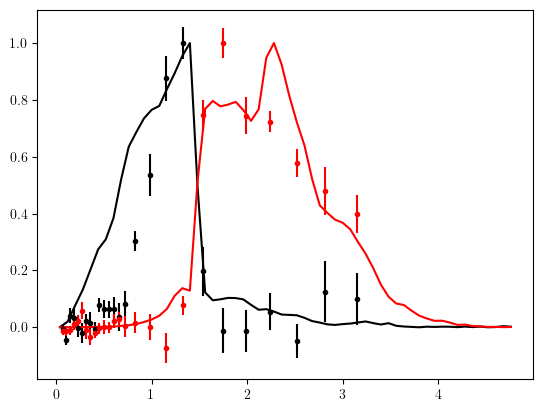

In [31]:
plt.errorbar(zz1, bnzz1/np.amax(bnzz1), yerr=ebnzz1/np.amax(bnzz1), fmt='k.')
plt.plot(z1, bnz1/np.amax(bnz1), 'k-')
plt.errorbar(zz2, bnzz2/np.amax(bnzz2), yerr=ebnzz2/np.amax(bnzz2), fmt='r.')
plt.plot(z2, bnz2/np.amax(bnz2), 'r-')


In [ ]:
b^1_1 = 1.356\pm 0.098 b^2_1 = 1.157\pm 0.093

In [ ]:
plotchains(['Fiducial', 'Tomo', 'planck'])
plotchains(['Tomo', 'Tomo1', 'Tomo2', 'planck'])